In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [6]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\IRIS.csv")
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species', ylabel='sepal_length'>

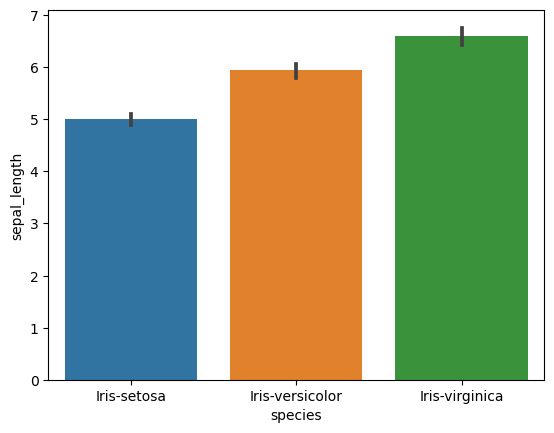

In [11]:
sns.barplot(y='sepal_length',x='species',data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

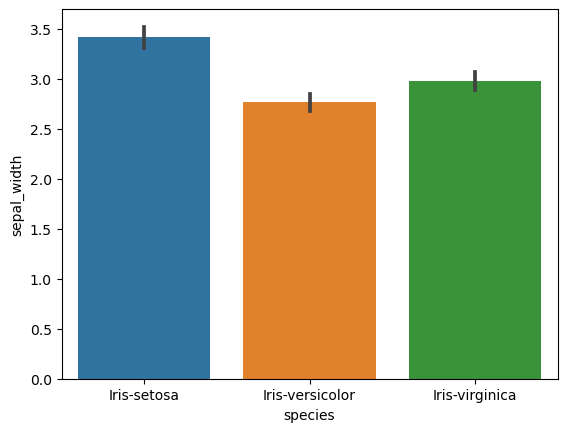

In [12]:
sns.barplot(x='species',y='sepal_width',data=df)

In [13]:
# the sepal width of the setosa is the highest 

<Axes: xlabel='species', ylabel='petal_width'>

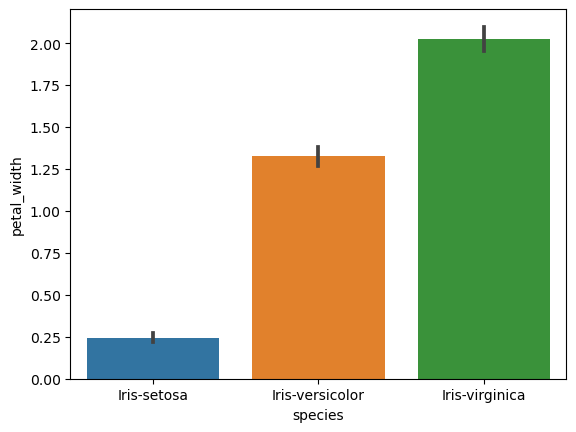

In [14]:
sns.barplot(x='species',y='petal_width',data=df)

<Axes: xlabel='species', ylabel='petal_length'>

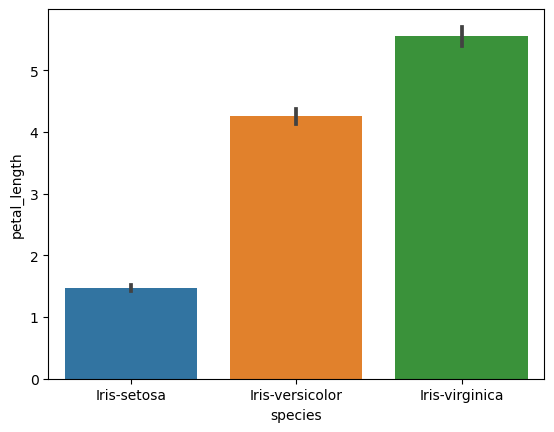

In [16]:
sns.barplot(x='species',y='petal_length',data=df)

In [19]:
X=df.drop("species",axis=1)
Y=df["species"]

In [20]:
#TRAINING THE MODEL

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101,stratify=Y)


In [39]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
133,6.3,2.8,5.1,1.5
42,4.4,3.2,1.3,0.2
128,6.4,2.8,5.6,2.1
106,4.9,2.5,4.5,1.7
87,6.3,2.3,4.4,1.3
...,...,...,...,...
14,5.8,4.0,1.2,0.2
51,6.4,3.2,4.5,1.5
94,5.6,2.7,4.2,1.3
54,6.5,2.8,4.6,1.5


In [40]:
#scaling

preprocess=Pipeline([('scaler',StandardScaler())
                    ])
#log
log=Pipeline([('preprocess',preprocess),
             ('classifier',LogisticRegression(multi_class='multinomial'))])
log.fit(X_train,Y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [41]:
a=log.predict(X_test)
a

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

<Axes: >

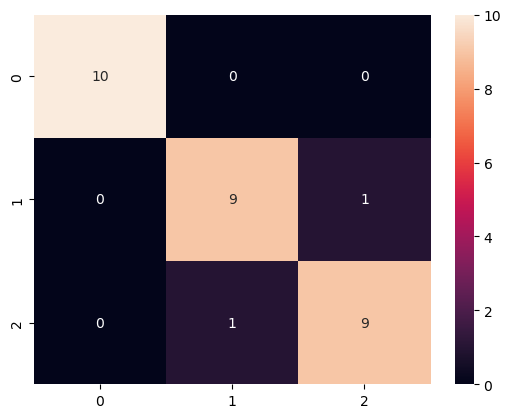

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
d=confusion_matrix(Y_test,a)
sns.heatmap(d,annot=True)


In [43]:
c=classification_report(Y_test,a)
print(c)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

